# 선형 분류기 훈련하기

In [21]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np


X, y = load_iris(return_X_y=True)
X = X[:100, :2]
y = y[:100]
X_scaled = StandardScaler().fit_transform(X)

model = LinearSVC(C=1.0)
model.fit(X_scaled, y)

LinearSVC()

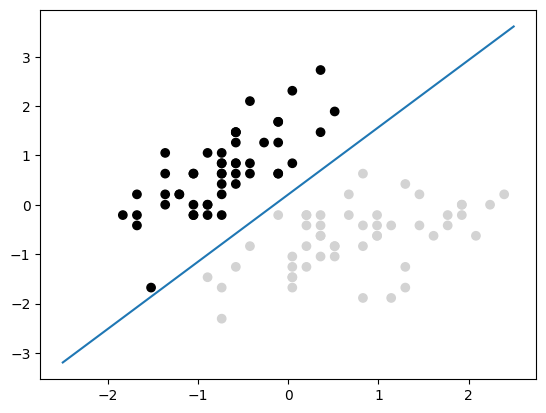

In [22]:
import matplotlib.pyplot as plt

color=['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=color)
w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-2.5, 2.5)
yy = a*xx - (model.intercept_[0]) / w[1]

plt.plot(xx, yy)
# plt.axis('off')

plt.show()

In [23]:
observation = [[-2, 3]]
model.predict(observation)

array([0])

In [24]:
model.decision_function(observation)

array([-6.84226607])

# 커널을 사용해 선형적으로 구분되지 않는 클래스 다루기

In [27]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(0)

X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0]> 0, X[:, 1]>0)
y = np.where(y, 0, 1)

model = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
model.fit(X, y)

SVC(C=1, gamma=1, random_state=0)

In [28]:
# 샘플과 결정 경계를 그립니다.
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap.colors[idx],
                    marker="+", label=cl)

In [29]:
# 선형 커널을 사용한 서포트 벡터 분류기를 만듭니다. with a linear kernel
model = SVC(kernel="linear", random_state=0, C=1)

# 모델을 훈련합니다.
model.fit(X, y)

SVC(C=1, kernel='linear', random_state=0)

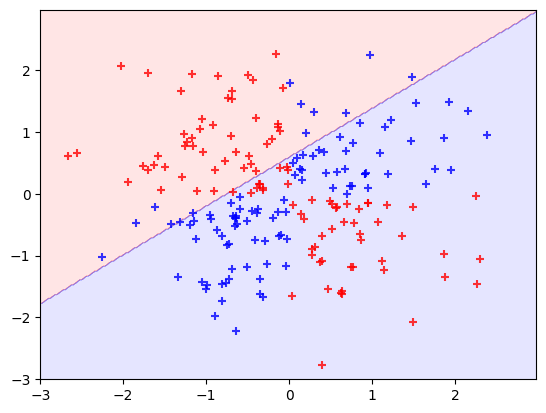

In [31]:
# 샘플과 초평면을 그립니다.
plot_decision_regions(X, y, classifier=model)
plt.axis("on"), plt.show();

In [32]:
# 방사 기저 함수 커널을 사용한 서포트 벡터 머신을 만듭니다.
model = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# 분류기를 훈련합니다.
model = model.fit(X, y)

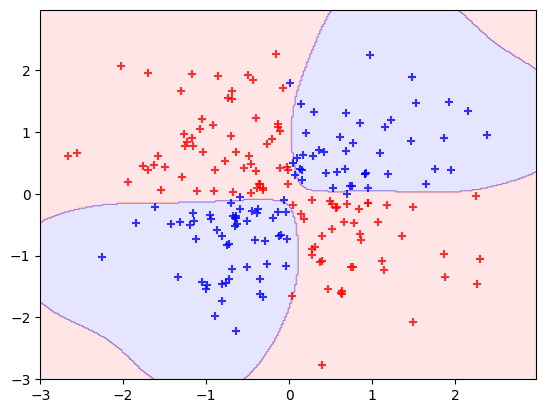

In [33]:
# 샘플과 초평면을 그립니다.
plot_decision_regions(X, y, classifier=model)
plt.axis("on"), plt.show();

# 예측 확률 계산하기

In [36]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(0)

X, y = load_iris(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

model = SVC(kernel='rbf', random_state=0, gamma=1, C=1, probability=True)
model.fit(X_scaled, y)

SVC(C=1, gamma=1, probability=True, random_state=0)

In [37]:
observation = [[.4, .4, .4, .4]]
model.predict_proba(observation)

array([[0.00835852, 0.9760332 , 0.01560828]])

# 서포트 벡터 식별하기

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(0)

X, y = load_iris(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

model = SVC(kernel='linear', random_state=0)
model.fit(X_scaled, y)
model.support_vectors_

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


array([[-0.90068117,  0.55861082, -1.16971425, -0.92054774],
       [-1.62768839, -1.74335684, -1.39706395, -1.18381211],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.79566902, -0.59237301,  0.47857113,  0.3957741 ],
       [ 0.55333328,  0.55861082,  0.53540856,  0.52740629],
       [-1.14301691, -1.51316008, -0.26031542, -0.26238682],
       [-0.29484182, -0.13197948,  0.42173371,  0.3957741 ],
       [ 0.4321654 , -1.97355361,  0.42173371,  0.3957741 ],
       [ 0.06866179,  0.32841405,  0.59224599,  0.79067065],
       [ 0.55333328, -1.28296331,  0.64908342,  0.3957741 ],
       [ 1.15917263, -0.59237301,  0.59224599,  0.26414192],
       [ 1.03800476, -0.13197948,  0.70592084,  0.65903847],
       [ 0.18982966, -0.36217625,  0.42173371,  0.3957741 ],
       [ 0.18982966, -0.82256978,  0.76275827,  0.52740629],
       [-0.53717756, -0.13197948,  0.42173371,  0.3957741 ],
       [ 0.55333328, -1.74335684,  0.36489628,  0.13250973],
       [-0.90068117, -1.

In [2]:
model.support_

array([ 23,  41,  52,  54,  56,  57,  66,  68,  70,  72,  76,  77,  78,
        83,  84,  87,  98, 106, 110, 119, 123, 126, 127, 129, 133, 134,
       137, 138, 149], dtype=int32)

In [3]:
model.n_support_

array([ 2, 15, 12], dtype=int32)

# 불균형한 클래스 다루기

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(0)

X, y = load_iris(return_X_y=True)
X = X[:100, :]
y = y[:100]
X = X[40:, :]
y = y[40:]

y = np.where((y==0), 0, 1)

X_scaled = StandardScaler().fit_transform(X)

model = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

model.fit(X_scaled, y)

SVC(class_weight='balanced', kernel='linear', random_state=0)